## `tenforty` Package Demo

This notebook contains several examples of the tenforty tax package to play with.

In [1]:
!pip install -U tenforty seaborn > /tmp/pip-install.log 2>&1

In [2]:
from tenforty import evaluate_return, evaluate_returns
from tenforty.models import OTSState, OTSYear, OTSFilingStatus
import seaborn.objects as so

For convenience we show the available states, years, and filing statuses:

In [3]:
print(f"Supported states: {[e.value for e in OTSState]}")
print(f"Supported tax years: {[e.value for e in OTSYear]}")
print(f"Filing statuses: {[e.value for e in OTSFilingStatus]}")

Supported states: [None, 'CA', 'MA', 'NY', 'AK', 'FL', 'NV', 'SD', 'TX', 'WA', 'WY']
Supported tax years: [2018, 2019, 2020, 2021, 2022]
Filing statuses: ['Single', 'Married/Joint', 'Head_of_House', 'Married/Sep', 'Widow(er)']


`evaluate_return` evaluates a single return:

In [4]:
evaluate_return(
    w2_income=100_000, state="CA", filing_status="Married/Joint", num_dependents=2
).model_dump()

{'total_tax': 10043.0,
 'federal_adjusted_gross_income': 100000.0,
 'federal_effective_tax_rate': 11.4,
 'federal_tax_bracket': 12.0,
 'federal_taxable_income': 74100.0,
 'federal_amt': 0.0,
 'federal_total_tax': 8484.0,
 'state_adjusted_gross_income': 100000.0,
 'state_taxable_income': 89596.0,
 'state_total_tax': 1559.0,
 'state_tax_bracket': 6.0,
 'state_effective_tax_rate': 3.0}

`evaluate_returns` evaluates a grid of return inputs, producing a table:

In [5]:
evaluate_returns(
    w2_income=list(range(50_000, 250_001, 50_000)),
    state="CA",
    filing_status="Married/Joint",
    num_dependents=2,
)[
    [
        "w2_income",
        "federal_effective_tax_rate",
        "federal_tax_bracket",
        "state_effective_tax_rate",
        "state_tax_bracket",
    ]
]

,w2_income,federal_effective_tax_rate,federal_tax_bracket,state_effective_tax_rate,state_tax_bracket
0,50000,10.3,12.0,1.5,2.0
1,100000,11.4,12.0,3.0,6.0
2,150000,14.9,22.0,4.6,9.3
3,200000,17.0,22.0,5.9,9.3
4,250000,18.5,24.0,6.6,9.3


The output of `evaluate_returns` is a pandas.DataFrame, so you can readily visualize the results:

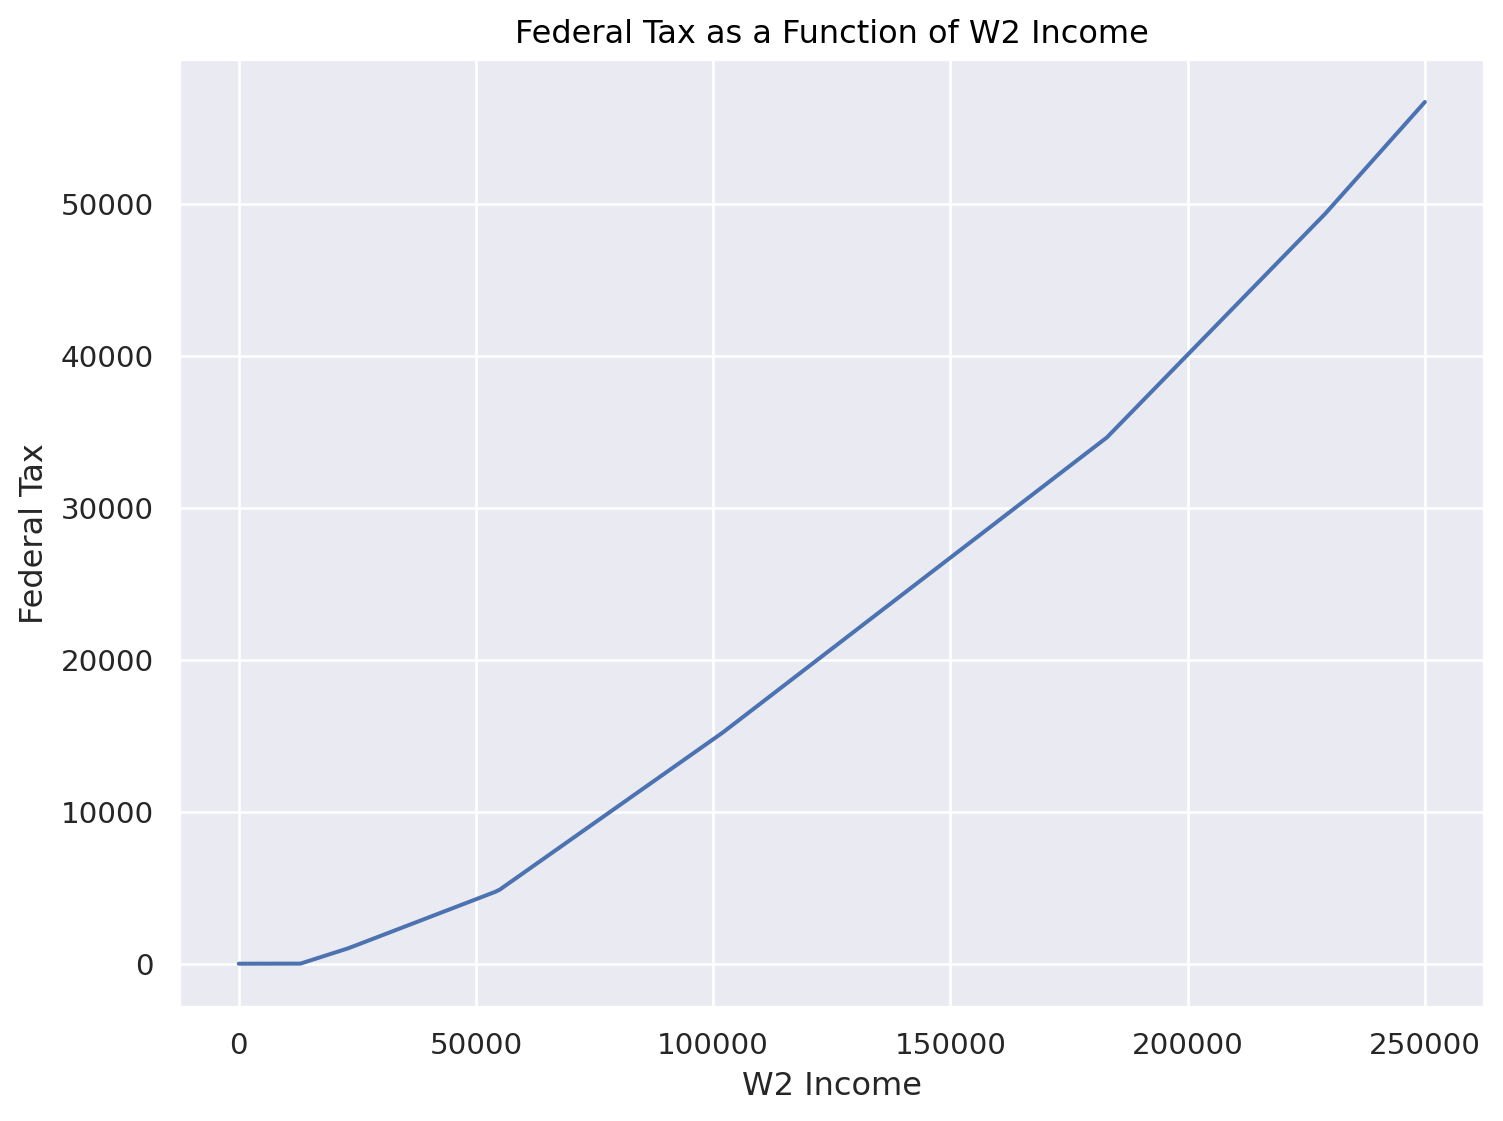

In [6]:
df = evaluate_returns(w2_income=list(range(0, 250_001, 1_000)))

(
    so.Plot(df, x="w2_income", y="total_tax")
    .add(so.Line())
    .label(
        x="W2 Income", y="Federal Tax", title="Federal Tax as a Function of W2 Income"
    )
    .layout(size=(8, 6))
)

`evaluate_returns` supports common types of income, including capital gains:

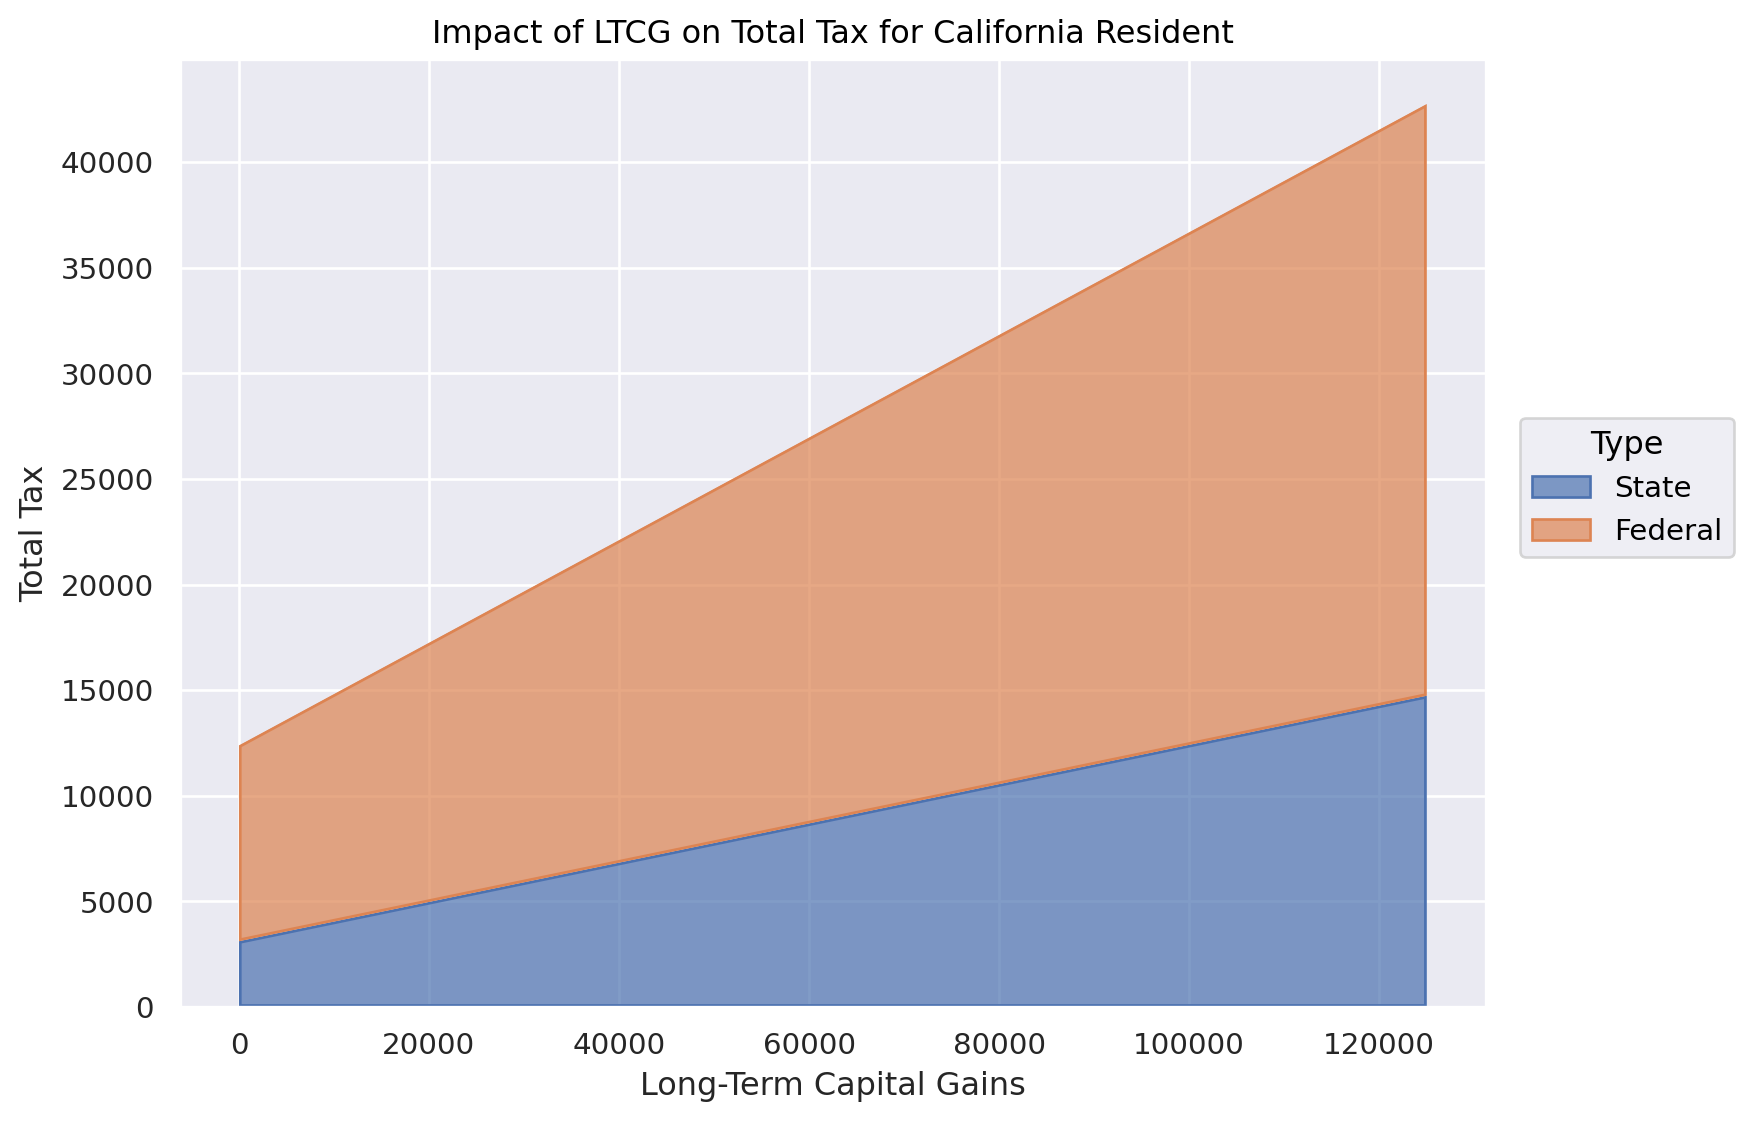

In [8]:
df = (
    evaluate_returns(
        w2_income=75_000,
        state="CA",
        long_term_capital_gains=list(range(0, 125_001, 5000)),
    )
    .loc[:, ["long_term_capital_gains", "state_total_tax", "federal_total_tax"]]
    .melt("long_term_capital_gains", var_name="Type", value_name="tax")
    .assign(
        Type=lambda f: f.Type.map(
            {"state_total_tax": "State", "federal_total_tax": "Federal"}
        )
    )
)

(
    so.Plot(df, x="long_term_capital_gains", y="tax", color="Type")
    .add(so.Area(alpha=0.7), so.Stack())
    .label(
        x="Long-Term Capital Gains",
        y="Total Tax",
        title="Impact of LTCG on Total Tax for California Resident",
    )
    .layout(size=(8, 6))
)